# Classifying Fashion-MNIST

Now it's your turn to build and train a neural network. You'll be using the [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist), a drop-in replacement for the MNIST dataset. MNIST is actually quite trivial with neural networks where you can easily achieve better than 97% accuracy. Fashion-MNIST is a set of 28x28 greyscale images of clothes. It's more complex than MNIST, so it's a better representation of the actual performance of your network, and a better representation of datasets you'll use in the real world.

<img src='assets/fashion-mnist-sprite.png' width=500px>

In this notebook, you'll build your own neural network. For the most part, you could just copy and paste the code from Part 3, but you wouldn't be learning. It's important for you to write the code yourself and get it to work. Feel free to consult the previous notebook though as you work through this.

First off, let's load the dataset through torchvision.

In [ ]:
import torch
from torchvision import datasets, transforms
import helper

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
# Download and load the training data
trainset = datasets.FashionMNIST('F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

Here we can see one of the images.

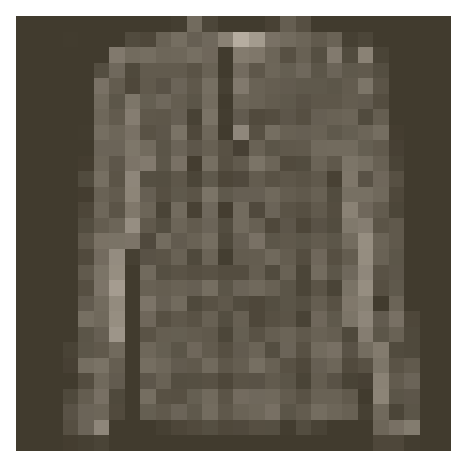

In [10]:
image, label = next(iter(trainloader))
helper.imshow(image[0,:]);

With the data loaded, it's time to import the necessary packages.

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import time
from collections import OrderedDict

import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms

import helper

## Building the network

Here you should define your network. As with MNIST, each image is 28x28 which is a total of 784 pixels, and there are 10 classes. You should include at least one hidden layer. We suggest you use ReLU activations for the layers and to return the logits from the forward pass. It's up to you how many layers you add and the size of those layers.

In [14]:
# Define your network architecture here

input_size = 784
hidden_size = [800, 400, 100]
output_size = 10

model = nn.Sequential(OrderedDict([
	('fc1', nn.Linear(input_size, hidden_size[0])),
	('relu1', nn.ReLU()),
	('fc2', nn.Linear(hidden_size[0], hidden_size[1])),
	('relu2', nn.ReLU()),
	('fc3', nn.Linear(hidden_size[1], hidden_size[2])),
	('relu3', nn.ReLU()),
	('output', nn.Linear(hidden_size[2], output_size)),
	('softmax', nn.Softmax(dim=1))
]))

model

Sequential(
  (fc1): Linear(in_features=784, out_features=800, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=800, out_features=400, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=400, out_features=100, bias=True)
  (relu3): ReLU()
  (output): Linear(in_features=100, out_features=10, bias=True)
  (softmax): Softmax()
)

# Train the network

Now you should create your network and train it. First you'll want to define [the criterion](http://pytorch.org/docs/master/nn.html#loss-functions) ( something like `nn.CrossEntropyLoss`) and [the optimizer](http://pytorch.org/docs/master/optim.html) (typically `optim.SGD` or `optim.Adam`).

Then write the training code. Remember the training pass is a fairly straightforward process:

* Make a forward pass through the network to get the logits 
* Use the logits to calculate the loss
* Perform a backward pass through the network with `loss.backward()` to calculate the gradients
* Take a step with the optimizer to update the weights

By adjusting the hyperparameters (hidden units, learning rate, etc), you should be able to get the training loss below 0.4.

In [15]:
# Create the network, define the criterion and optimizer

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [17]:
# Train the network here
epochs = 5
print_every = 50
steps = 0

for e in range(epochs):
	running_loss = 0
	for images, labels in iter(trainloader):
		steps += 1
		# Flatten MNIST fashion set
		images.resize_(images.shape[0], 784)
		
		# Zero out optimizer
		optimizer.zero_grad()
		
		# Forward and Backward pass
		output = model.forward(images)
		loss = criterion(output, labels)
		loss.backward()
		optimizer.step()
		
		running_loss = loss.item()
		
		if steps % print_every == 0:
			print("Epoch {}/{}... ".format(e+1, epochs))
			print("Loss {:.4f}".format(running_loss/print_every))
			
			running_loss = 0

Epoch 1/5... 
Loss 0.0376


Epoch 1/5... 
Loss 0.0349


Epoch 1/5... 
Loss 0.0349


Epoch 1/5... 
Loss 0.0338


Epoch 1/5... 
Loss 0.0329


Epoch 1/5... 
Loss 0.0358


Epoch 1/5... 
Loss 0.0337


Epoch 1/5... 
Loss 0.0341


Epoch 1/5... 
Loss 0.0329


Epoch 1/5... 
Loss 0.0349


Epoch 1/5... 
Loss 0.0350


Epoch 1/5... 
Loss 0.0324


Epoch 1/5... 
Loss 0.0351


Epoch 1/5... 
Loss 0.0353


Epoch 1/5... 
Loss 0.0354


Epoch 1/5... 
Loss 0.0343


Epoch 1/5... 
Loss 0.0335


Epoch 1/5... 
Loss 0.0342


Epoch 2/5... 
Loss 0.0327


Epoch 2/5... 
Loss 0.0349


Epoch 2/5... 
Loss 0.0339


Epoch 2/5... 
Loss 0.0326


Epoch 2/5... 
Loss 0.0356


Epoch 2/5... 
Loss 0.0331


Epoch 2/5... 
Loss 0.0327


Epoch 2/5... 
Loss 0.0346


Epoch 2/5... 
Loss 0.0330


Epoch 2/5... 
Loss 0.0353


Epoch 2/5... 
Loss 0.0336


Epoch 2/5... 
Loss 0.0350


Epoch 2/5... 
Loss 0.0352


Epoch 2/5... 
Loss 0.0341


Epoch 2/5... 
Loss 0.0345


Epoch 2/5... 
Loss 0.0335


Epoch 2/5... 
Loss 0.0331


Epoch 2/5... 
Loss 0.0360


Epoch 2/5... 
Loss 0.0339


Epoch 3/5... 
Loss 0.0360


Epoch 3/5... 
Loss 0.0350


Epoch 3/5... 
Loss 0.0327


Epoch 3/5... 
Loss 0.0343


Epoch 3/5... 
Loss 0.0338


Epoch 3/5... 
Loss 0.0334


Epoch 3/5... 
Loss 0.0336


Epoch 3/5... 
Loss 0.0337


Epoch 3/5... 
Loss 0.0338


Epoch 3/5... 
Loss 0.0350


Epoch 3/5... 
Loss 0.0340


Epoch 3/5... 
Loss 0.0352


Epoch 3/5... 
Loss 0.0343


Epoch 3/5... 
Loss 0.0314


Epoch 3/5... 
Loss 0.0350


Epoch 3/5... 
Loss 0.0341


Epoch 3/5... 
Loss 0.0334


Epoch 3/5... 
Loss 0.0348


Epoch 3/5... 
Loss 0.0320


Epoch 4/5... 
Loss 0.0331


Epoch 4/5... 
Loss 0.0349


Epoch 4/5... 
Loss 0.0333


Epoch 4/5... 
Loss 0.0330


Epoch 4/5... 
Loss 0.0348


Epoch 4/5... 
Loss 0.0332


Epoch 4/5... 
Loss 0.0327


Epoch 4/5... 
Loss 0.0327


Epoch 4/5... 
Loss 0.0340


Epoch 4/5... 
Loss 0.0331


Epoch 4/5... 
Loss 0.0330


Epoch 4/5... 
Loss 0.0345


Epoch 4/5... 
Loss 0.0345


Epoch 4/5... 
Loss 0.0334


Epoch 4/5... 
Loss 0.0342


Epoch 4/5... 
Loss 0.0325


Epoch 4/5... 
Loss 0.0345


Epoch 4/5... 
Loss 0.0342


Epoch 4/5... 
Loss 0.0337


Epoch 5/5... 
Loss 0.0338


Epoch 5/5... 
Loss 0.0334


Epoch 5/5... 
Loss 0.0348


Epoch 5/5... 
Loss 0.0346


Epoch 5/5... 
Loss 0.0335


Epoch 5/5... 
Loss 0.0346


Epoch 5/5... 
Loss 0.0324


Epoch 5/5... 
Loss 0.0331


Epoch 5/5... 
Loss 0.0339


Epoch 5/5... 
Loss 0.0336


Epoch 5/5... 
Loss 0.0329


Epoch 5/5... 
Loss 0.0356


Epoch 5/5... 
Loss 0.0348


Epoch 5/5... 
Loss 0.0342


Epoch 5/5... 
Loss 0.0335


Epoch 5/5... 
Loss 0.0337


Epoch 5/5... 
Loss 0.0360


Epoch 5/5... 
Loss 0.0328


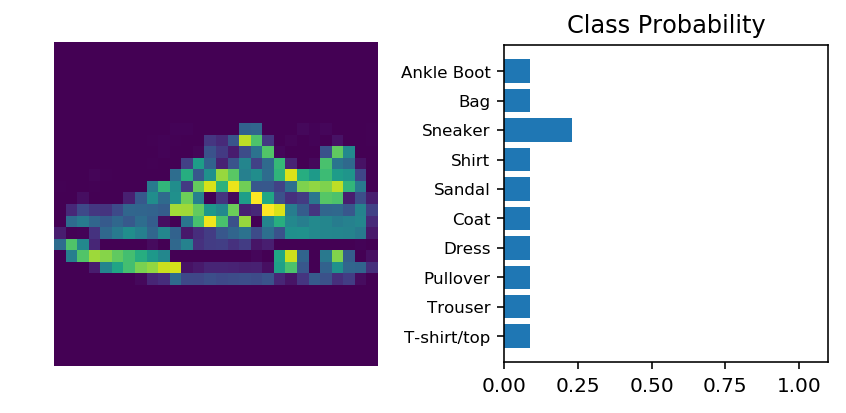

In [26]:
# Test out your network!

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[5]
# Convert 2D image to 1D vector
img = img.resize_(1, 784)

# Calculate the class probabilities (softmax) for img
with torch.no_grad():
	output = model.forward(img)
	
ps = F.softmax(output, dim=1)

# Plot the image and probabilities
helper.view_classify(img.resize_(1, 28, 28), ps, version='Fashion')

Now that your network is trained, you'll want to save it to disk so you can load it later instead of training it again. Obviously, it's impractical to train a network every time you need one. In practice, you'll train it once, save the model, then reload it for further training or making predictions. In the next part, I'll show you how to save and load trained models.